<a href="https://colab.research.google.com/github/MalharJ21/DL-Collab/blob/main/1132210397_MalharJadhav_DL_assingment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Assingment 2
# Name : Malhar H Jadhav
# PRN : 1132210397
# Roll No : 49

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train=pd.read_csv("/content/drive/MyDrive/Datasets/fashion-mnist_train.csv")
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_test=pd.read_csv("/content/drive/MyDrive/Datasets/fashion-mnist_test.csv")
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

In [5]:
train=np.array(df_train,dtype="float32")
test=np.array(df_test,dtype="float32")

5.0

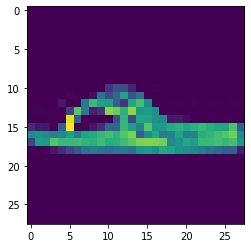

In [6]:
import random
i=random.randint(1,60000)
plt.imshow(train[i,1:].reshape(28,28))
label=train[i,0]
label

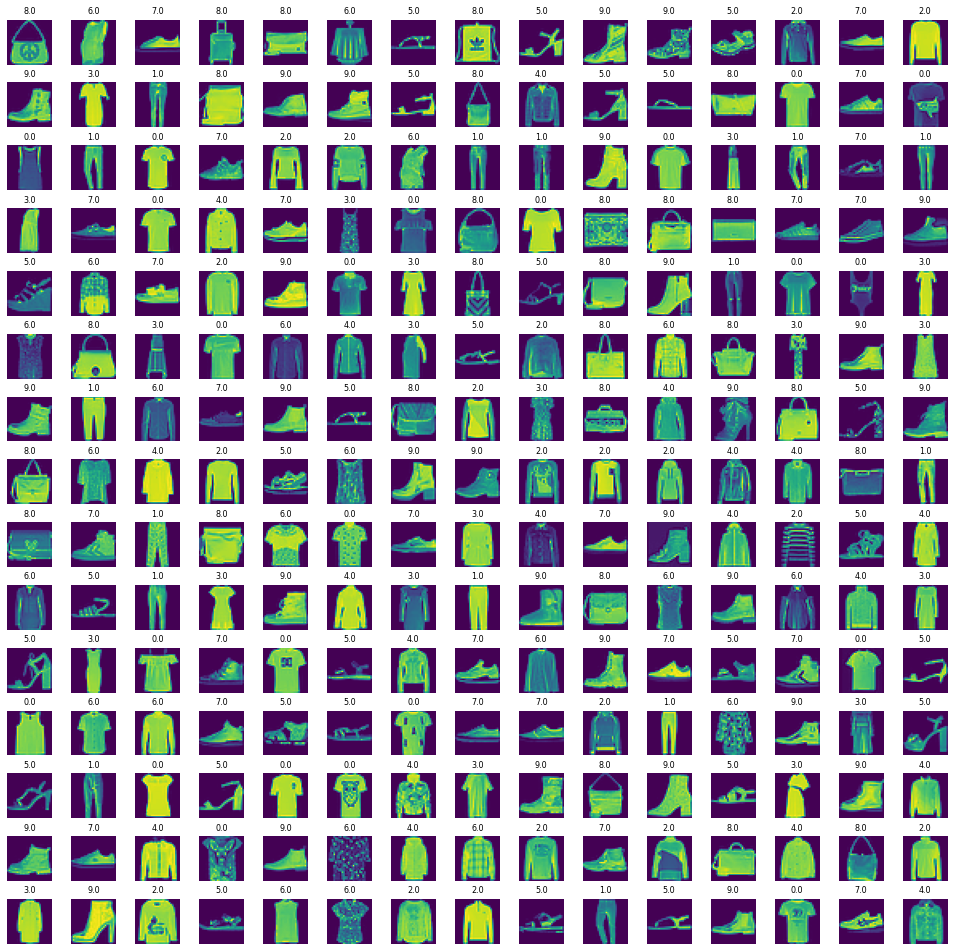

In [7]:
fig,axes=plt.subplots(15,15,figsize=(17,17))
axes=axes.ravel() #flatten the 15*15 matrix into 255 array
n_training=len(train)
for i in np.arange(0,15*15):
    index=np.random.randint(0,n_training)
    axes[i].imshow(train[index,1:].reshape(28,28))
    axes[i].set_title(train[index,0],fontsize=8)
    axes[i].axis("off")
    
plt.subplots_adjust(hspace=0.4)

In [8]:
xtrain=train[:,1:]/255
ytrain=train[:,0]
xtest=test[:,1:]/255
ytest=test[:,0]

In [9]:
from sklearn.model_selection import train_test_split
xtrain,xvalidate,ytrain,yvalidate=train_test_split(xtrain,ytrain,test_size=0.2,random_state=101)

In [10]:
xtrain=xtrain.reshape(xtrain.shape[0],*(28,28,1))
xvalidate=xvalidate.reshape(xvalidate.shape[0],*(28,28,1))
xtest=xtest.reshape(xtest.shape[0],*(28,28,1))

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.callbacks import TensorBoard   

In [12]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [18]:
pip install keras-tuner --upgrade


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.3 MB/s 
     |████████████████████████████████| 1.6 MB 42.2 MB/s 


In [19]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  """Entry point for launching an IPython kernel.


In [20]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [21]:
tuner_search.search(xtrain,ytrain,epochs=3,validation_split=0.1)


Trial 5 Complete [00h 15m 55s]
val_accuracy: 0.8554166555404663

Best val_accuracy So Far: 0.902916669845581
Total elapsed time: 01h 23m 18s


In [22]:
model=tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 112)       2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        32288     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 112)               1734768   
                                                                 
 dense_1 (Dense)             (None, 10)                1130      
                                                                 
Total params: 1,771,098
Trainable params: 1,771,098
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.fit(xtrain,ytrain,batch_size=32,epochs=5,verbose=1,validation_data=(xvalidate,yvalidate))


Epoch 1/5
1500/1500 [==============================] - 248s 166ms/step - loss: 0.0515 - accuracy: 0.9811 - val_loss: 0.4541 - val_accuracy: 0.9116
Epoch 2/5
1500/1500 [==============================] - 237s 158ms/step - loss: 0.0402 - accuracy: 0.9852 - val_loss: 0.5058 - val_accuracy: 0.9085
Epoch 3/5
1500/1500 [==============================] - 231s 154ms/step - loss: 0.0335 - accuracy: 0.9882 - val_loss: 0.5632 - val_accuracy: 0.9002
Epoch 4/5
1500/1500 [==============================] - 226s 151ms/step - loss: 0.0294 - accuracy: 0.9898 - val_loss: 0.5931 - val_accuracy: 0.9081
Epoch 5/5
1500/1500 [==============================] - 228s 152ms/step - loss: 0.0244 - accuracy: 0.9918 - val_loss: 0.5836 - val_accuracy: 0.9049


In [25]:
evaluation=model.evaluate(xtest,ytest)
print("Test Accuracy: {:.3f}".format(evaluation[1]))

313/313 [==============================] - 13s 42ms/step - loss: 0.5462 - accuracy: 0.9063
Test Accuracy: 0.906


In [26]:
pred=model.predict(xtest)
pred_class=np.argmax(pred,axis=1)

In [27]:
pred_class


array([0, 1, 2, ..., 8, 8, 1])

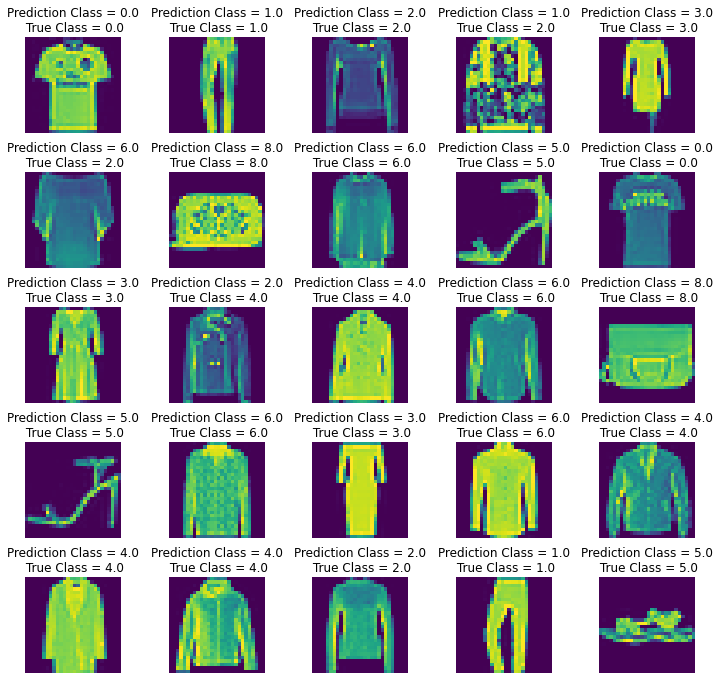

In [28]:
fig,axes=plt.subplots(5,5,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0, 5 * 5):  
    axes[i].imshow(xtest[i].reshape(28,28))
    axes[i].set_title("Prediction Class = {:0.1f}\n True Class = {:0.1f}".format(pred_class[i],ytest[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

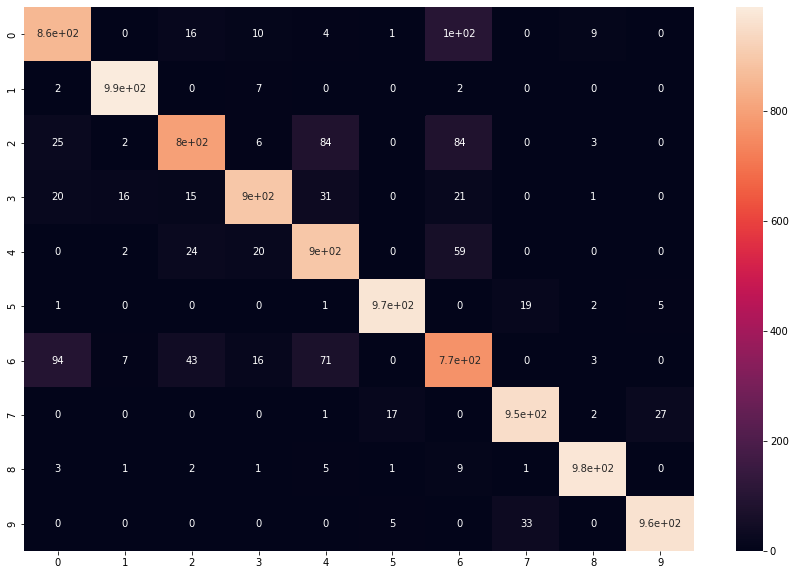

In [29]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,pred_class)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

In [30]:
from sklearn.metrics import classification_report
target_name=["Class {}".format(i) for i in range(10)]
print(classification_report(ytest,pred_class,target_names=target_name))

              precision    recall  f1-score   support

     Class 0       0.86      0.86      0.86      1000
     Class 1       0.97      0.99      0.98      1000
     Class 2       0.89      0.80      0.84      1000
     Class 3       0.94      0.90      0.92      1000
     Class 4       0.82      0.90      0.86      1000
     Class 5       0.98      0.97      0.97      1000
     Class 6       0.73      0.77      0.75      1000
     Class 7       0.95      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

